In [1]:
# We temporarily disable warnings for demonstration.
# FutureWarnings and DeprecationWarnings are present from some of the AMPL 
# dependency modules.
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_context("poster")
sns.set_style("whitegrid")
sns.set_palette("Set2")

import pandas as pd
import os, json, sys, glob, pickle
import requests


from atomsci.ddm.pipeline import model_pipeline as mp
from atomsci.ddm.pipeline import parameter_parser as parse
import atomsci.ddm.utils.curate_data as curate_data
import atomsci.ddm.utils.struct_utils as struct_utils
from atomsci.ddm.pipeline import perf_plots as pp
import atomsci.ddm.pipeline.diversity_plots as dp

Skipped loading modules with pytorch-geometric dependency, missing a dependency. No module named 'torch_geometric'
Skipped loading modules with pytorch-geometric dependency, missing a dependency. cannot import name 'DMPNN' from 'deepchem.models.torch_models' (/home/jupyter/atomsci/lib/python3.8/site-packages/deepchem/models/torch_models/__init__.py)
Skipped loading modules with pytorch-lightning dependency, missing a dependency. No module named 'pytorch_lightning'
Skipped loading some Jax models, missing a dependency. jax requires jaxlib to be installed. See https://github.com/google/jax#installation for installation instructions.
DEBUG:ATOM:Model tracker client not supported in your environment; will save models in filesystem only.


In [2]:
pwd

'/home/jupyter'

In [3]:
df = pd.read_csv('qmugs_11.csv', sep=',')
df.head()

In [5]:
df_cut = df.head(200)
df_cut.shape

(200, 70)

In [6]:
df_cut.columns

Index(['identifier', 'conf_id', 'smiles', 'charge', 'unpaired_electrons', 'mw',
       'atoms', 'heavy_atoms', 'heteroatoms', 'rotatable_bonds',
       'stereocenters', 'rings', 'hbond_acceptors', 'hbond_donors',
       'lowest_wavenumber', 'GFN2_TOTAL_ENERGY', 'GFN2_ATOMIC_ENERGY',
       'GFN2_FORMATION_ENERGY', 'GFN2_TOTAL_ENTHALPY',
       'GFN2_TOTAL_FREE_ENERGY', 'GFN2_DIPOLE_X', 'GFN2_DIPOLE_Y',
       'GFN2_DIPOLE_Z', 'GFN2_DIPOLE_TOT', 'GFN2_QUADRUPOLE_XX',
       'GFN2_QUADRUPOLE_XY', 'GFN2_QUADRUPOLE_YY', 'GFN2_QUADRUPOLE_XZ',
       'GFN2_QUADRUPOLE_yz', 'GFN2_QUADRUPOLE_ZZ', 'GFN2_ROT_CONSTANT_A',
       'GFN2_ROT_CONSTANT_B', 'GFN2_ROT_CONSTANT_C', 'GFN2_ENTHALPY_VIB',
       'GFN2_ENTHALPY_ROT', 'GFN2_ENTHALPY_TRANSL', 'GFN2_ENTHALPY_TOT',
       'GFN2_HEAT_CAPACITY_VIB', 'GFN2_HEAT_CAPACITY_ROT',
       'GFN2_HEAT_CAPACITY_TRANSL', 'GFN2_HEAT_CAPACITY_TOT',
       'GFN2_ENTROPY_VIB', 'GFN2_ENTROPY_ROT', 'GFN2_ENTROPY_TRANSL',
       'GFN2_ENTROPY_TOT', 'GFN2_HOMO_ENERGY

In [60]:
df_edit = df_cut[["smiles","mw","heavy_atoms","atoms","heteroatoms","rings","GFN2_HOMO_LUMO_GAP","DFT_HOMO_LUMO_GAP"]]
df_full_edit = df[["smiles","mw","heavy_atoms","atoms","heteroatoms","rings","GFN2_HOMO_LUMO_GAP","DFT_HOMO_LUMO_GAP"]]

In [8]:
df_edit.shape

(200, 8)

In [61]:
df_full_edit['rdkit_smiles'] = df_full_edit['smiles'].apply(curate_data.base_smiles_from_smiles)

df_full_edit['inchi_key'] = df_full_edit['smiles'].apply(struct_utils.smiles_to_inchi_key)

df_full_edit['compound_id'] = df_full_edit['inchi_key']

[15:59:07] Can't kekulize mol.  Unkekulized atoms: 0 3 5 6 7 9 10
[15:59:52] WARNING: Proton(s) added/removed

[15:59:52] WARNING: Proton(s) added/removed

[15:59:52] WARNING: Proton(s) added/removed

[15:59:52] WARNING: Proton(s) added/removed

[15:59:52] WARNING: Proton(s) added/removed

[15:59:52] WARNING: Proton(s) added/removed

[15:59:52] WARNING: Proton(s) added/removed

[15:59:52] WARNING: Proton(s) added/removed

[15:59:52] WARNING: Proton(s) added/removed

[15:59:52] WARNING: Proton(s) added/removed

[15:59:52] WARNING: Proton(s) added/removed

[15:59:52] WARNING: Proton(s) added/removed

[15:59:52] WARNING: Proton(s) added/removed

[15:59:52] WARNING: Proton(s) added/removed; Omitted undefined stereo

[15:59:52] WARNING: Proton(s) added/removed

[15:59:52] WARNING: Proton(s) added/removed

[15:59:52] WARNING: Proton(s) added/removed

[15:59:52] WARNING: Proton(s) added/removed

[15:59:52] WARNING: Proton(s) added/removed

[15:59:52] WARNING: Proton(s) added/removed

[15:59:5

In [9]:
df_edit['rdkit_smiles'] = df_edit['smiles'].apply(curate_data.base_smiles_from_smiles)

df_edit['inchi_key'] = df_edit['smiles'].apply(struct_utils.smiles_to_inchi_key)

df_edit['compound_id'] = df_edit['inchi_key']

[11:24:33] WARNING: Proton(s) added/removed

[11:24:33] WARNING: Proton(s) added/removed

[11:24:33] WARNING: Proton(s) added/removed

[11:24:33] WARNING: Proton(s) added/removed

[11:24:33] WARNING: Proton(s) added/removed

[11:24:33] WARNING: Proton(s) added/removed

[11:24:33] WARNING: Proton(s) added/removed

[11:24:33] WARNING: Proton(s) added/removed

[11:24:33] WARNING: Proton(s) added/removed

[11:24:33] WARNING: Proton(s) added/removed

[11:24:33] WARNING: Proton(s) added/removed

[11:24:33] WARNING: Proton(s) added/removed

[11:24:33] WARNING: Proton(s) added/removed

[11:24:33] WARNING: Proton(s) added/removed; Omitted undefined stereo

[11:24:33] WARNING: Proton(s) added/removed

[11:24:33] WARNING: Proton(s) added/removed

[11:24:33] WARNING: Proton(s) added/removed

[11:24:33] WARNING: Proton(s) added/removed

[11:24:33] WARNING: Proton(s) added/removed

[11:24:33] WARNING: Proton(s) added/removed

[11:24:33] WARNING: Proton(s) added/removed

[11:24:33] WARNING: Proton(s)

In [23]:
#df_edit.head(20)
df_edit.describe()

,mw,heavy_atoms,atoms,heteroatoms,rings,GFN2_HOMO_LUMO_GAP,DFT_HOMO_LUMO_GAP
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,399.414183,28.210000,52.950000,6.480000,3.125000,0.082397,0.292003
std,125.748013,8.883156,16.376767,3.115789,1.730418,0.067540,0.069455
min,88.112076,6.000000,18.000000,1.000000,0.000000,0.004106,0.146000
25%,343.880554,24.000000,43.000000,4.000000,2.000000,0.037003,0.241370
50%,401.594877,29.000000,52.500000,6.000000,3.000000,0.067125,0.280418
75%,477.452725,34.000000,63.000000,8.000000,4.000000,0.106293,0.331576
max,882.491002,63.000000,130.000000,19.000000,9.000000,0.373725,0.558294


In [24]:
df_rings_0_3 = df_edit[df_edit['rings'].between(0, 3.5)]

In [25]:
df_rings_0_3.shape

(115, 11)

<AxesSubplot:>

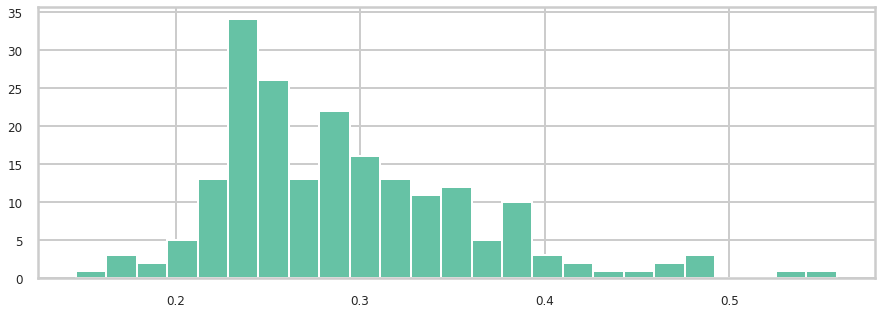

In [28]:
df_edit['DFT_HOMO_LUMO_GAP'].hist(figsize=(15,5), bins=25)

<AxesSubplot:>

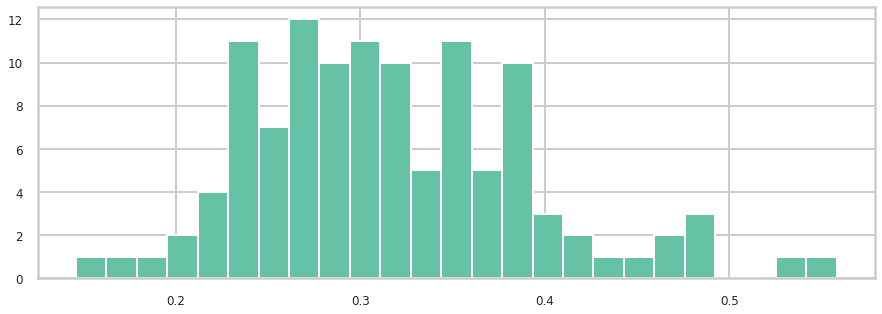

In [29]:
df_rings_0_3['DFT_HOMO_LUMO_GAP'].hist(figsize=(15,5), bins=25)


In [10]:
from rdkit import Chem
from rdkit.Chem import Draw, Descriptors, rdqueries
from rdkit.Chem import rdchem


In [13]:
smiles = df_edit[['rdkit_smiles']]

In [31]:
fxn_group = pd.read_csv('fxngroup.csv')
fxn_group.head()

,smiles
0,CC(O)=O
1,CC(N)=O
2,CC([NH])=O
3,NC=O


In [33]:
fxn_group['rdkit_smiles'] = fxn_group['smiles'].apply(curate_data.base_smiles_from_smiles)
fxn_group.head()

,smiles,rdkit_smiles
0,CC(O)=O,CC(=O)O
1,CC(N)=O,CC(N)=O
2,CC([NH])=O,CC([NH])=O
3,NC=O,NC=O


In [74]:
### Determine which functional groups are wanted. Create SMARTS files for each functional group and label appropriately.

fg = Chem.MolFromSmarts('C(=O)[NX3;H2]')
#fx = Chem.MolFromSmarts('CC(=O)N[C@H]')

#fy = Chem.MolFromSmarts('CC(=O)O')
#fz = Chem.MolFromSmarts('O=C[O]')
#fw = Chem.MolFromSmarts('N[S](=O)=O')
#fm = Chem.MolFromSmarts('O=S=O')

famide = Chem.MolFromSmarts('CC(N)=O')
fcarbox = Chem.MolFromSmarts('CC(O)=O')
fsulfonyl = Chem.MolFromSmarts('CS(=O)(C)=O')
fsulfonamide = Chem.MolFromSmarts('NS(C)(=O)=O')
falc = Chem.MolFromSmarts('OC')
facrylate = Chem.MolFromSmarts('O=C([O])C=C')
faldehyde = Chem.MolFromSmarts('CC=O')
fmethoxyalcohol = Chem.MolFromSmarts('OC[O]')
fhydroxyacetamide = Chem.MolFromSmarts('O=C[N]O')
facrylamide = Chem.MolFromSmarts('O=C([N])C=C')
fcarbamate = Chem.MolFromSmarts('O=C([O])[N]')
foxyirane = Chem.MolFromSmarts('O1CC1')
f_allamide = Chem.MolFromSmarts('NC=O')


In [62]:
### Search rdkit_smiles from curated data to find molecules that the functional groups are located in.

df_full_edit["amides"] = [len(Chem.MolFromSmiles(smile).GetSubstructMatch(famide)) for smile in df_full_edit["rdkit_smiles"]]
df_full_edit["carboxy"] = [len(Chem.MolFromSmiles(smile).GetSubstructMatch(fcarbox)) for smile in df_full_edit["rdkit_smiles"]]
df_full_edit["sulfonyl"] = [len(Chem.MolFromSmiles(smile).GetSubstructMatch(fsulfonyl)) for smile in df_full_edit["rdkit_smiles"]]
df_full_edit["sulfonamide"] = [len(Chem.MolFromSmiles(smile).GetSubstructMatch(fsulfonamide)) for smile in df_full_edit["rdkit_smiles"]]
df_full_edit["alcohol"] = [len(Chem.MolFromSmiles(smile).GetSubstructMatch(falc)) for smile in df_full_edit["rdkit_smiles"]]
df_full_edit["acrylate"] = [len(Chem.MolFromSmiles(smile).GetSubstructMatch(facrylate)) for smile in df_full_edit["rdkit_smiles"]]
df_full_edit["aldehyde"] = [len(Chem.MolFromSmiles(smile).GetSubstructMatch(faldehyde)) for smile in df_full_edit["rdkit_smiles"]]
df_full_edit["methoxyalcohol"] = [len(Chem.MolFromSmiles(smile).GetSubstructMatch(fmethoxyalcohol)) for smile in df_full_edit["rdkit_smiles"]]
df_full_edit["hydroxyacetamide"] = [len(Chem.MolFromSmiles(smile).GetSubstructMatch(fhydroxyacetamide)) for smile in df_full_edit["rdkit_smiles"]]
df_full_edit["acrylamide"] = [len(Chem.MolFromSmiles(smile).GetSubstructMatch(facrylamide)) for smile in df_full_edit["rdkit_smiles"]]
df_full_edit["carbamate"] = [len(Chem.MolFromSmiles(smile).GetSubstructMatch(fcarbamate)) for smile in df_full_edit["rdkit_smiles"]]
df_full_edit["oxyirane"] = [len(Chem.MolFromSmiles(smile).GetSubstructMatch(foxyirane)) for smile in df_full_edit["rdkit_smiles"]]
df_full_edit["allamide"] = [len(Chem.MolFromSmiles(smile).GetSubstructMatch(f_allamide)) for smile in df_full_edit["rdkit_smiles"]]
df_full_edit["amide_NH2"] = [len(Chem.MolFromSmiles(smile).GetSubstructMatch(fg)) for smile in df_full_edit["rdkit_smiles"]]


In [70]:
smiles["HA_count"] = [len(Chem.MolFromSmiles(smile).GetSubstructMatch(fg)) for smile in smiles["rdkit_smiles"]]
smiles["amides"] = [len(Chem.MolFromSmiles(smile).GetSubstructMatch(famide)) for smile in smiles["rdkit_smiles"]]
smiles["carboxy"] = [len(Chem.MolFromSmiles(smile).GetSubstructMatch(fcarbox)) for smile in smiles["rdkit_smiles"]]
smiles["sulfonyl"] = [len(Chem.MolFromSmiles(smile).GetSubstructMatch(fsulfonyl)) for smile in smiles["rdkit_smiles"]]
smiles["sulfonamide"] = [len(Chem.MolFromSmiles(smile).GetSubstructMatch(fsulfonamide)) for smile in smiles["rdkit_smiles"]]
smiles["alcohol"] = [len(Chem.MolFromSmiles(smile).GetSubstructMatch(falc)) for smile in smiles["rdkit_smiles"]]
smiles["acrylate"] = [len(Chem.MolFromSmiles(smile).GetSubstructMatch(facrylate)) for smile in smiles["rdkit_smiles"]]
smiles["aldehyde"] = [len(Chem.MolFromSmiles(smile).GetSubstructMatch(faldehyde)) for smile in smiles["rdkit_smiles"]]
smiles["methoxyalcohol"] = [len(Chem.MolFromSmiles(smile).GetSubstructMatch(fmethoxyalcohol)) for smile in smiles["rdkit_smiles"]]
smiles["hydroxyacetamide"] = [len(Chem.MolFromSmiles(smile).GetSubstructMatch(fhydroxyacetamide)) for smile in smiles["rdkit_smiles"]]
smiles["acrylamide"] = [len(Chem.MolFromSmiles(smile).GetSubstructMatch(facrylamide)) for smile in smiles["rdkit_smiles"]]
smiles["carbamate"] = [len(Chem.MolFromSmiles(smile).GetSubstructMatch(fcarbamate)) for smile in smiles["rdkit_smiles"]]
smiles["oxyirane"] = [len(Chem.MolFromSmiles(smile).GetSubstructMatch(foxyirane)) for smile in smiles["rdkit_smiles"]]

In [75]:
df_full_edit["allamide"] = [len(Chem.MolFromSmiles(smile).GetSubstructMatch(f_allamide)) for smile in df_full_edit["rdkit_smiles"]]

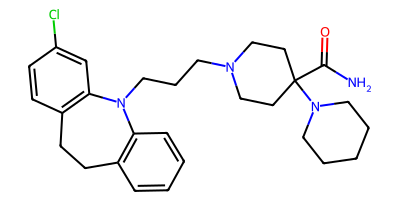

In [31]:
## Example from website.  https://chemistry.stackexchange.com/questions/163223/python-and-rdkit-to-extract-sub-structures-in-a-smiles

m = Chem.MolFromSmiles('NC(=O)C1(CCN(CCCN2C3=C(CCC4=C2C=C(Cl)C=C4)C=CC=C3)CC1)N1CCCCC1')
Draw.MolToImage(m, size=(400,200))

In [33]:
fg = Chem.MolFromSmarts('C(=O)[NX3;H2]') # SMARTS for -CONH2
print('Functional group:', len(m.GetSubstructMatches(fg)), '-CONH2')

Functional group: 1 -CONH2


In [58]:
smiles.head()

,rdkit_smiles,HA_count,amides,carboxy,sulfonyl,sulfonamide,alcohol,acrylate,aldehyde,methoxyalcohol,hydroxyacetamide,acrylamide,carbamate,oxyirane
0,CC(=O)N[C@H](Cc1ccccc1)C(=O)N1CCC[C@H]1C(=O)N[...,0,4,0,0,0,0,0,3,0,0,0,0,0
1,CC(C)c1cc(-c2ccc(F)cc2)c(OC[C@@H](O)C[C@@H](O)...,0,0,4,0,0,2,0,3,0,0,0,0,0
2,CN(CC(=O)N[C@@H](CCCCN)B(O)O)C(=O)Cc1ccccc1,0,4,0,0,0,0,0,3,0,0,0,0,0
3,Cc1ccc(C(=C(/C=C/[C@@H](O)C[C@@H](O)CC(=O)[O-]...,0,0,4,0,0,2,0,3,0,0,0,0,0
4,O=C(c1ccn2c1CS[C@@H]2c1cccnc1)c1cn(C(=O)c2cccc...,3,0,0,0,0,0,0,0,0,0,0,0,0


In [59]:
### Make sure the columns are predicting the functional groups.

smiles.describe()

,HA_count,amides,carboxy,sulfonyl,sulfonamide,alcohol,acrylate,aldehyde,methoxyalcohol,hydroxyacetamide,acrylamide,carbamate,oxyirane
count,200.000000,200.000000,200.000000,200.0,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.0,200.0,200.0
mean,0.480000,1.240000,1.140000,0.0,0.275000,1.130000,0.200000,1.590000,0.060000,0.040000,0.0,0.0,0.0
std,1.102578,1.854615,1.810189,0.0,1.142762,0.994002,0.982255,1.501055,0.421054,0.398994,0.0,0.0,0.0
min,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
25%,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
50%,0.000000,0.000000,0.000000,0.0,0.000000,2.000000,0.000000,3.000000,0.000000,0.000000,0.0,0.0,0.0
75%,0.000000,4.000000,4.000000,0.0,0.000000,2.000000,0.000000,3.000000,0.000000,0.000000,0.0,0.0,0.0
max,3.000000,4.000000,4.000000,0.0,5.000000,2.000000,5.000000,3.000000,3.000000,4.000000,0.0,0.0,0.0


In [76]:
df_full_edit.describe()

,mw,heavy_atoms,atoms,heteroatoms,rings,GFN2_HOMO_LUMO_GAP,DFT_HOMO_LUMO_GAP,amides,carboxy,sulfonyl,...,alcohol,acrylate,aldehyde,methoxyalcohol,hydroxyacetamide,acrylamide,carbamate,oxyirane,amide,allamide
count,27082.000000,27082.000000,27082.000000,27082.00000,27082.000000,27082.000000,27082.000000,27082.000000,27082.000000,27082.000000,...,27082.000000,27082.000000,27082.000000,27082.000000,27082.000000,27082.000000,27082.000000,27082.000000,27082.000000,27082.000000
mean,429.702326,30.284396,57.846540,7.29791,3.517392,0.078288,0.283866,0.875268,0.861089,0.040433,...,1.214312,0.184255,1.287645,0.215457,0.017872,0.087143,0.129237,0.008530,0.063363,0.928070
std,187.128141,13.076604,27.147803,5.13879,2.113052,0.050177,0.057497,1.653807,1.644074,0.447813,...,0.976783,0.941997,1.484920,0.774578,0.266777,0.654321,0.707294,0.159741,0.431371,1.386711
min,43.029075,3.000000,3.000000,1.00000,0.000000,0.000130,0.015744,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,306.198948,22.000000,39.000000,4.00000,2.000000,0.046161,0.242501,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,398.119795,28.000000,52.000000,6.00000,3.000000,0.071395,0.281644,0.000000,0.000000,0.000000,...,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,504.286459,36.000000,69.000000,9.00000,5.000000,0.102729,0.319047,0.000000,0.000000,0.000000,...,2.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,1585.077803,100.000000,271.000000,59.00000,31.000000,0.800288,0.657125,4.000000,4.000000,5.000000,...,2.000000,5.000000,3.000000,3.000000,4.000000,5.000000,4.000000,3.000000,3.000000,3.000000


In [65]:
### Make sure the compounds showing the functional groups have the functional groups present. In this example I looked at the oxirane functional group. 
#First sort the dataframe based on the functional group you are interested in. Create a dataframe of that tail. And visualize the dataframe. 
oxyirane_sorted = df_full_edit.sort_values("oxyirane")
tail = oxyirane_sorted.tail(10)

In [55]:
smiles_sorted = smiles.sort_values("HA_count")
smiles_sorted.tail(50)


,rdkit_smiles,HA_count
87,Cc1cc(C(=C(/C=C/[C@@H](O)C[C@@H](O)CC(=O)[O-])...,0
88,C[N+](C)(C)Cc1cc(-c2c3nc(c(-c4ccccc4)c4ccc([nH...,0
89,Cc1cc(C)c(/C=C/[C@@H](O)C[C@@H](O)CC(=O)[O-])c...,0
90,CCn1nnnc1C(/C=C/[C@@H](O)C[C@@H](O)CC(=O)[O-])...,0
91,CCCC[n+]1ccn(CCC(C(N)=O)(c2ccccc2)c2ccccc2)c1C,0
68,Cc1cc(C)cc(CCN(CC(=O)NC(CCCCN)B(O)O)C(=O)CCc2c...,0
67,CCCCCCCC[C@@H](SCCCCCC)C(=O)Nc1c(SC)cc[n+](C)c1SC,0
75,CCOC(=O)c1c(Br)c(OC)c2c(c1-c1c3c(c(OC)c(Br)c1C...,0
61,Cc1n(CCCCC(C(N)=O)(c2ccccc2)c2ccccc2)cc[n+]1Cc...,0
53,CCn1nnc(C(/C=C/[C@@H](O)C[C@@H](O)CC(=O)[O-])=...,0


In [67]:
## Modules needed for drawing and visualizing the compounds.

from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit.Chem import rdDepictor
from itertools import islice

#Needed to show molecules
from rdkit.Chem.Draw import IPythonConsole 

from rdkit.Chem.Draw.MolDrawing import MolDrawing, DrawingOptions 
from rdkit.Chem import PandasTools
from rdkit.Chem.Draw import IPythonConsole

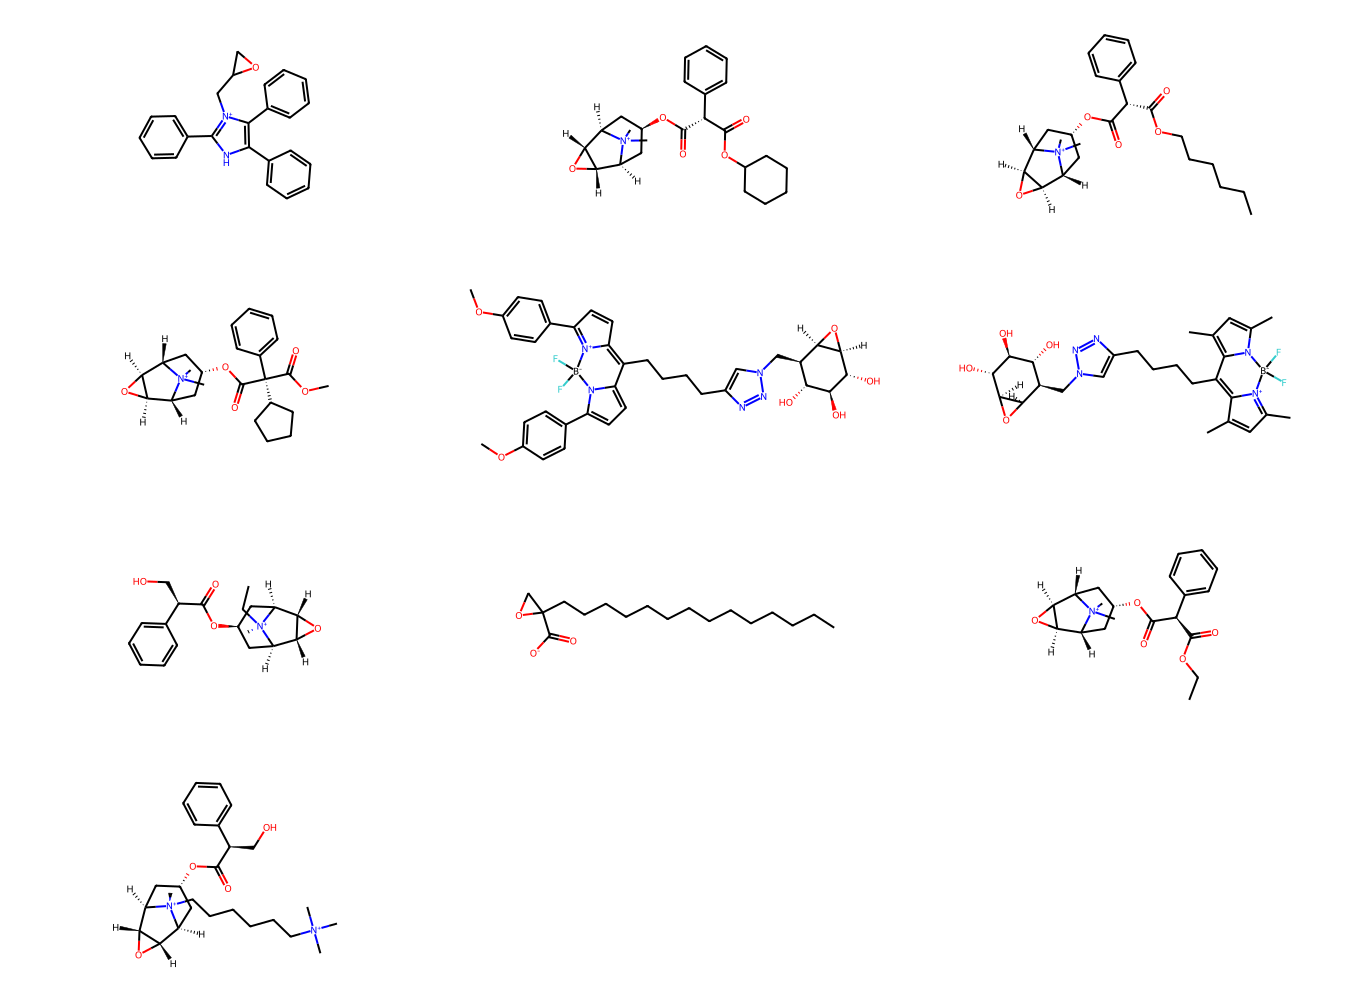

In [69]:
## Notice all the visualized compounds have the three membered ring with two carbons and one oxygen. The location and stereochemistry is not taken into consideration.

molecules_oxirane = [Chem.MolFromSmiles(smiles)
             for smiles in islice(tail['rdkit_smiles'],10)]

Draw.MolsToGridImage(molecules_oxirane,  subImgSize=(450,250))

In [77]:
## Some groups also looked at the R value, comparing heteroatoms vs heavy atoms. Heteroatoms are any atom besides carbon and hydrogen, and heavy atoms are any atom besides hydrogen.

df_full_edit['R_value'] = df_full_edit['heteroatoms']/df_full_edit['heavy_atoms']

In [78]:
df_full_edit.describe()

,mw,heavy_atoms,atoms,heteroatoms,rings,GFN2_HOMO_LUMO_GAP,DFT_HOMO_LUMO_GAP,amides,carboxy,sulfonyl,...,acrylate,aldehyde,methoxyalcohol,hydroxyacetamide,acrylamide,carbamate,oxyirane,amide,allamide,R_value
count,27082.000000,27082.000000,27082.000000,27082.00000,27082.000000,27082.000000,27082.000000,27082.000000,27082.000000,27082.000000,...,27082.000000,27082.000000,27082.000000,27082.000000,27082.000000,27082.000000,27082.000000,27082.000000,27082.000000,27082.000000
mean,429.702326,30.284396,57.846540,7.29791,3.517392,0.078288,0.283866,0.875268,0.861089,0.040433,...,0.184255,1.287645,0.215457,0.017872,0.087143,0.129237,0.008530,0.063363,0.928070,0.243406
std,187.128141,13.076604,27.147803,5.13879,2.113052,0.050177,0.057497,1.653807,1.644074,0.447813,...,0.941997,1.484920,0.774578,0.266777,0.654321,0.707294,0.159741,0.431371,1.386711,0.119554
min,43.029075,3.000000,3.000000,1.00000,0.000000,0.000130,0.015744,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.027027
25%,306.198948,22.000000,39.000000,4.00000,2.000000,0.046161,0.242501,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.160000
50%,398.119795,28.000000,52.000000,6.00000,3.000000,0.071395,0.281644,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.222222
75%,504.286459,36.000000,69.000000,9.00000,5.000000,0.102729,0.319047,0.000000,0.000000,0.000000,...,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.307692
max,1585.077803,100.000000,271.000000,59.00000,31.000000,0.800288,0.657125,4.000000,4.000000,5.000000,...,5.000000,3.000000,3.000000,4.000000,5.000000,4.000000,3.000000,3.000000,3.000000,1.000000


In [79]:
df_full_edit.head()

,smiles,mw,heavy_atoms,atoms,heteroatoms,rings,GFN2_HOMO_LUMO_GAP,DFT_HOMO_LUMO_GAP,rdkit_smiles,inchi_key,...,acrylate,aldehyde,methoxyalcohol,hydroxyacetamide,acrylamide,carbamate,oxyirane,amide,allamide,R_value
0,[H]OB(O[H])[C@@]([H])(N([H])C(=O)[C@@]1([H])N(...,432.254401,31,64,10,2,0.128555,0.359226,CC(=O)N[C@H](Cc1ccccc1)C(=O)N1CCC[C@H]1C(=O)N[...,UCQIHCRMWNRFNP-QYZOEREBSA-N,...,0,3,0,0,0,0,0,0,3,0.322581
1,[H]O[C@]([H])(C([H])([H])Oc1c(-c2c([H])c([H])c...,417.208276,30,60,6,2,0.015995,0.237322,CC(C)c1cc(-c2ccc(F)cc2)c(OC[C@@H](O)C[C@@H](O)...,GWJDCGLHTDEKGT-UXHICEINSA-M,...,0,3,0,0,0,0,0,0,0,0.200000
2,[H]OB(O[H])[C@@]([H])(N([H])C(=O)C([H])([H])N(...,335.201637,24,50,8,1,0.126069,0.352346,CN(CC(=O)N[C@@H](CCCCN)B(O)O)C(=O)Cc1ccccc1,VPLBUOGKJQGYQO-AWEZNQCLSA-N,...,0,3,0,0,0,0,0,0,3,0.333333
3,[H]O[C@]([H])(/C([H])=C(\[H])C(=C(c1c([H])c([H...,475.235079,35,66,8,3,0.070257,0.294730,Cc1ccc(C(=C(/C=C/[C@@H](O)C[C@@H](O)CC(=O)[O-]...,UUVPDWUBKWQFOU-AZHXHMFBSA-M,...,0,3,0,0,0,0,0,0,0,0.228571
4,[H]c1nc([H])c([C@@]2([H])SC([H])([H])c3c(C(=O)...,622.091215,44,65,11,7,0.090870,0.295396,O=C(c1ccn2c1CS[C@@H]2c1cccnc1)c1cn(C(=O)c2cccc...,WSTGIXIJIWZIHP-MGBGTMOVSA-M,...,0,0,0,0,0,0,0,0,0,0.250000
